In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from island import Island
from geometry import *
from continuum import Continuum

In [2]:
geo = ToroidalGeometry(a=1, R0=3, B0=1)
A = 0.00001
myisland = Island(geo, 5, 2, 0.125, 4, A)

In [34]:
mycont = Continuum(myisland, -14, 33, -7, 7, fft_multiplier=8,  mfp=1, nfp=2)

In [39]:
explim=16
chilist = -A - np.exp(-np.linspace(0, explim, 101)) * A
chilist = -A - np.linspace(0,1,101) * 0.0015 - 0.01*A
psibar, omega = mycont.compute_continuum(chilist, passing=True, sign=1)
psibar2, omega2 = mycont.compute_continuum(chilist, passing=True, sign=-1)

pflux = chilist + psibar / myisland.q0
pflux2 = chilist + psibar2 / myisland.q0

omega *= 3**2
omega2 *= 3**2

In [40]:
_,Omega, qplus = myisland.get_psibar_omega_q_passing(chilist, sign=1)
_,Omega, qminus = myisland.get_psibar_omega_q_passing(chilist, sign=-1)

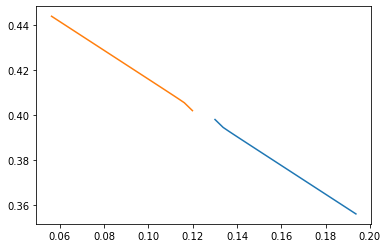

In [41]:
plt.plot(psibar[:,None], 1/qplus)
plt.plot(psibar2[:,None], 1/qminus)

(0.0, 0.3)

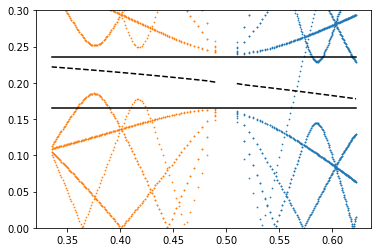

In [42]:
rp = np.sqrt(2 * psibar[:,None])
rm = np.sqrt(2 * psibar2[:,None])
plt.scatter(np.broadcast_to(rp, omega.shape), np.sqrt(np.abs(omega)), s=0.5)
plt.scatter(np.broadcast_to(rm, omega.shape), np.sqrt(np.abs(omega2)), s=0.5)


#plt.plot(rm, abs(3/ qminus - 1), 'r')
#plt.plot(rp, abs(3/ qplus - 1), 'r')

plt.plot(rm, abs(1/2/ qminus), 'k--')
plt.plot(rp, abs(1/2/ qplus), 'k--')

xpoints = np.array([np.min(rm), np.max(rp)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
plt.ylim([0.0,0.3])

In [4]:
mycont = Continuum(myisland, -32, 65, -9, 10, fft_multiplier=8,  mfp=1, nfp=2)

In [5]:
explim=16
chilist = -A + np.exp(-np.linspace(0, explim, 51)) * A
chilist = -A + np.linspace(0, 2, 51)[1:-1] * A
#chilist = np.linspace(0.99*A, 0.96*A, 51)
psibar, omega, vlist = mycont.compute_continuum(chilist, passing=False, sign=1, eigenvector=True)
omega *= 3**2
_,Omegat, qt = myisland.get_psibar_omega_q_trapped(chilist)

LinAlgError: The leading minor of order 41 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

(0.0, 0.3)

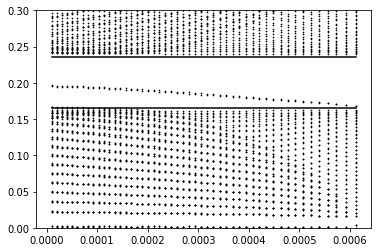

In [5]:
plt.scatter(np.broadcast_to(psibar[:,None], omega.shape), np.sqrt(np.abs(omega)), c='k', s=0.5)
#plt.plot(psibar, np.abs(Omegat - 2/5) / 2, 'r')
#plt.plot(psibar, np.abs(-Omegat - 2/5) / 2, 'r')
xpoints = np.array([np.min(psibar), np.max(psibar)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
#plt.plot(psibar, np.abs( 0* Omegat + 1/5), 'r')
plt.ylim([0,0.30])

(0.15, 0.25)

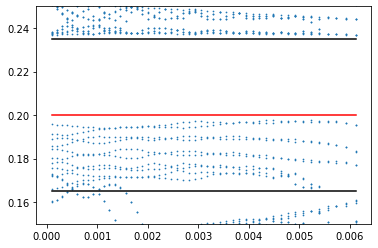

In [131]:
plt.scatter(np.broadcast_to(psibar[:,None], omega.shape), np.sqrt(np.abs(omega)), s=0.5)
plt.plot(psibar, np.abs(Omegat) / 2, 'r')
plt.plot(psibar, np.abs(Omegat) / 1, 'r')
xpoints = np.array([np.min(psibar), np.max(psibar)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
plt.plot(psibar, np.abs( 0* Omegat + 1/5), 'r')
plt.ylim([0.15,0.25])

In [9]:
id=64
print(np.sqrt(omega[-1,id]))
v = np.reshape(vlist[0][:,id], [mycont.mcount, mycont.ncount])

0.196383329725497


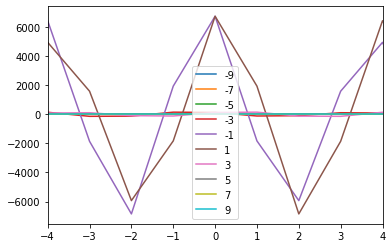

In [11]:
mm, nn = v.shape
for i in range(nn):
    plt.plot(mycont.mlist, np.real(v[:, i]))

plt.legend([mycont.nlist[i] for i in range(nn)])
plt.xlim([-4,4])
plt.show()


In [12]:
zeta = np.linspace(0, 10 * np.pi, 256, endpoint=False)
alphabar = np.linspace(0, 2*np.pi, 128, endpoint=False)

phi = np.sum(v[:,:,None, None] * np.exp(complex(0,1) * (mycont.mlist[:,None,None,None] * alphabar[None,None,:,None] + mycont.nlist[None,:,None,None] * zeta[None,None,None,:] / 5)), (0,1))

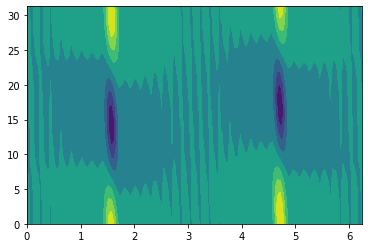

In [13]:
plt.contourf(alphabar, zeta, np.real(phi).T)

In [30]:
plt.plot(alphabar, np.real(phi[:,10]))

NameError: name 'alphabar' is not defined

(0.15, 0.25)

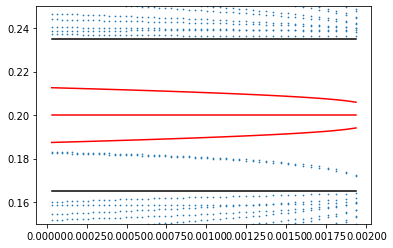

In [27]:
plt.scatter(np.broadcast_to(psibar[:,None], omega.shape), np.sqrt(np.abs(omega)), s=0.5)
plt.plot(psibar, np.abs(Omegat - 1/5), 'r')
plt.plot(psibar, np.abs(Omegat + 1/5), 'r')
plt.plot(psibar, np.abs(Omegat * 0 + 1/5), 'r')
xpoints = np.array([np.min(psibar), np.max(psibar)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
plt.ylim([0.15,0.25])

(0.0, 0.3)

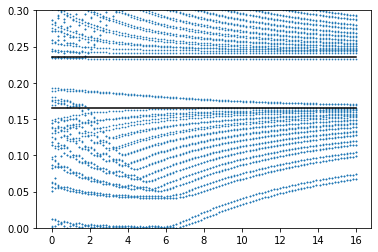

In [155]:
psibar = np.linspace(0, explim, 101)
plt.scatter(np.broadcast_to(psibar[:,None], omega.shape), np.sqrt(np.abs(omega)), s=0.5)
xpoints = np.array([np.min(psibar), np.max(psibar)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
plt.ylim([0.0,0.3])

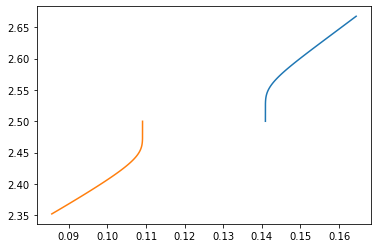

In [42]:
psibar, Omega, q = myisland.get_psibar_omega_q_passing(-0.0001 - np.linspace(0, 1, 101)**2*0.0004, +1)
plt.plot(psibar,q)
psibar, Omega, q = myisland.get_psibar_omega_q_passing(-0.0001 - np.linspace(0, 1, 101)**2*0.0004, -1)
plt.plot(psibar,q)

In [32]:
zeta = np.linspace(0, 10 * np.pi, 256, endpoint=False)
alphabar = np.linspace(0, 2*np.pi, 128, endpoint=False)

J, gradchi2, B2 = myisland.get_J_gradchi2_B2(-0.999*A, alphabar, zeta, False)

In [46]:
Bfft = np.fft.fft2(np.sqrt(B2.T)) / B2.size
gradchi2fft = np.fft.fft2(gradchi2.T) / B2.size
combI = J.T * gradchi2.T / B2.T
combfft = np.fft.fft2(combI) / B2.size

In [47]:
print(combfft[0,2] / combfft[0,0])
print(combfft[2,0] / combfft[0,0])
print(combfft[2,2] / combfft[0,0])
print(combfft[2,-2] / combfft[0,0])

(0.5000307269892659-1.7304673523202077e-18j)
(0.3491185243038988-9.5023804489542e-17j)
(0.17466564098997955-4.637116386966147e-17j)
(0.17447807590287076-4.3782908914125734e-17j)


In [49]:
gradchi2fft[0,2]/gradchi2fft[0,0]

(0.5000306305537591-3.298359158220801e-19j)

(-5.0, 0.0)

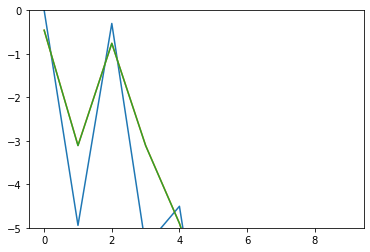

In [57]:
plt.plot(np.log10(np.abs(combfft[0,0:10] / combfft[0,0])))
plt.plot(np.log10(np.abs(combfft[2,0:10] / combfft[0,0])))
plt.plot(np.log10(np.abs(combfft[-2,0:10] / combfft[0,0])))
plt.ylim([-5,0])

(-5.0, 0.0)

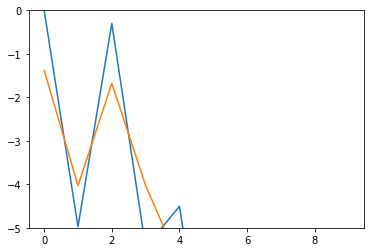

In [55]:
plt.plot(np.log10(np.abs(gradchi2fft[0,0:10] / gradchi2fft[0,0])))
plt.plot(np.log10(np.abs(gradchi2fft[2,0:10] / gradchi2fft[0,0])))
plt.plot(np.log10(np.abs(gradchi2fft[4,0:10] / gradchi2fft[0,0])))
plt.plot(np.log10(np.abs(gradchi2fft[6,0:10] / gradchi2fft[0,0])))
plt.ylim([-5,0])

In [116]:
Ifftd = combfft.copy()
Ifftd[0,0] = 0
Ifftd[2,0] = 0
Ifftd[-2,0] = 0
Ifftd[0,2] = 0
Ifftd[0,-2] = 0
Ifftd[2,2] = 0
Ifftd[-2,2] = 0
Ifftd[2,-2] = 0
Ifftd[-2,-2] = 0
combfft1 = combfft - Ifftd
comb = np.fft.ifft2(combfft1) * B2.size

In [117]:
print(np.min(comb))
print(np.min(combI))

(4.130257241435509e-10-5.40615844678822e-25j)
3.7594613181710364e-10


In [109]:
np.min(gradchi2)

1.1146918567685156e-09

In [98]:
np.max(gradchi2)

3.6278620947898247e-06

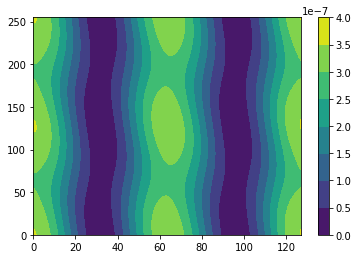

In [11]:
plt.contourf(np.real(gradchi2.T))
plt.colorbar()

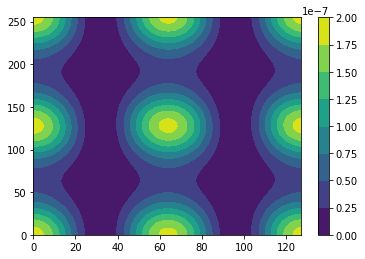

In [118]:
plt.contourf(np.real(combI))
plt.colorbar()

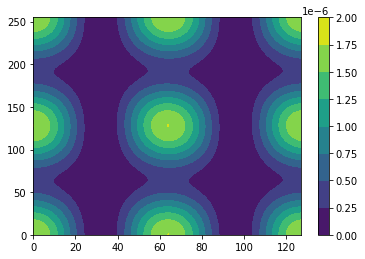

In [111]:
plt.contourf(np.abs(comb))
plt.colorbar()

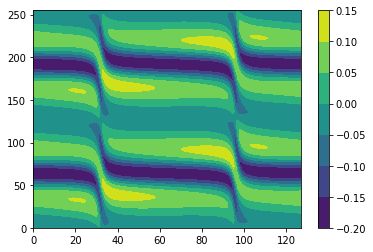

In [119]:
plt.contourf((np.real(comb)-combI)/abs(combI))
plt.colorbar()

In [21]:
geo = ToroidalGeometry(a=1, R0=3, B0=1)
A = 0.000000001
myisland = Island(geo, 5, 2, 0.125, 4, A)
mycont = Continuum(myisland, -40, 81, -7, 8, fft_multiplier=8,  mfp=1, nfp=2)

In [3]:
explim=16
chilist = -A + np.exp(-np.linspace(0, explim, 51)) * A
chilist = -A + np.linspace(0, 2, 51)[1:-1] * A
#chilist = np.linspace(0.96*A, 0.99*A, 51)
psibar, omega, vlist = mycont.compute_continuum(chilist, passing=False, sign=1, eigenvector=True)
omega *= 3**2
_,Omegat, qt = myisland.get_psibar_omega_q_trapped(chilist)

(0.0, 0.3)

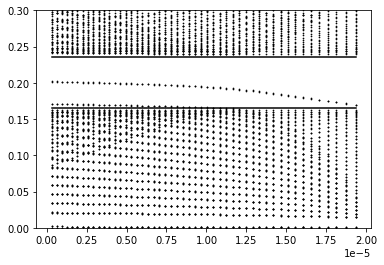

In [4]:
plt.scatter(np.broadcast_to(psibar[:,None], omega.shape), np.sqrt(np.real(omega)), c='k', s=0.5)
#plt.plot(psibar, np.abs(Omegat - 2/5) / 2, 'r')
#plt.plot(psibar, np.abs(-Omegat - 2/5) / 2, 'r')
xpoints = np.array([np.min(psibar), np.max(psibar)])
up = [0.165, 0.165]
down = [0.235,0.235]
plt.plot(xpoints, up, 'k')
plt.plot(xpoints, down, 'k')
#plt.plot(psibar, np.abs( 0* Omegat + 1/5), 'r')
plt.ylim([0,0.30])

0.171235552059752


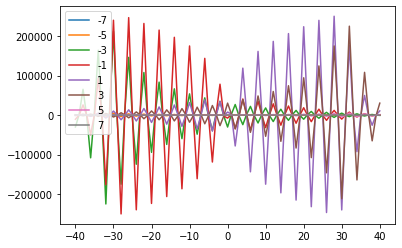

In [5]:
id=78
print(np.sqrt(omega[-1,id]))
v = np.reshape(vlist[-1][:,id], [mycont.mcount, mycont.ncount])
mm, nn = v.shape
for i in range(nn):
    plt.plot(mycont.mlist, np.real(v[:, i]))

plt.legend([mycont.nlist[i] for i in range(nn)])
#plt.xlim([-4,4])
plt.show()

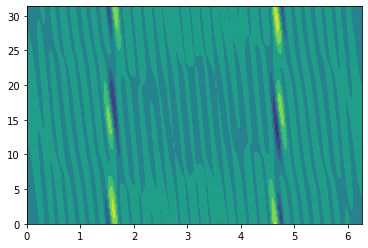

In [55]:
zeta = np.linspace(0, 10 * np.pi, 256*2, endpoint=False)
alphabar = np.linspace(0, 2*np.pi, 128*2, endpoint=False)

phi = np.sum(v[:,:,None, None] * np.exp(complex(0,1) * (mycont.mlist[:,None,None,None] * alphabar[None,None,:,None] + mycont.nlist[None,:,None,None] * zeta[None,None,None,:] / 5)), (0,1))
plt.contourf(alphabar, zeta, np.real(phi).T * (1 + 0.5*np.cos(2 * alphabar)))

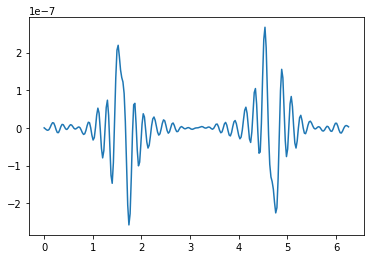

In [56]:
plt.plot(alphabar, np.real(phi[:,256//2]))

In [18]:
alphalist = np.linspace(0,10*np.pi,257)
zeta = np.array([0])
alpha = myisland._alpha_trapped(alphalist, 0.9995)
psi, theta = myisland.get_psi_and_theta_trapped(-0.999*A, alphalist, zeta)

In [39]:
np.min(gradchi2)/np.max(gradchi2)

1.6913891039194242e-10